In [63]:
# Import packages
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime
import os.path

%matplotlib inline

In [64]:
# read or download dataframe
# downloaded from https://open.canada.ca/data/en/dataset/261c32ab-4cfd-4f81-9dea-7b64065690dc
url = 'https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv'

current_date = datetime.date.today().strftime("%Y%m%d")
covid_filename =  'covid19_raw_' + current_date + '.csv'
covid_filepath = './data/covid/' + covid_filename
if os.path.isfile(covid_filepath):
    print("File exists")
    covid_data = pd.read_csv(covid_filepath, parse_dates=['date'])
else:
    print("File does not exist")
    covid_data = pd.read_csv(url, parse_dates=['date'])
    covid_data.to_csv(covid_filepath, index=False, header=True)


File exists


In [65]:
covid_data.head()

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,2020-01-31,3,0,0.0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,2020-01-31,1,0,0.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,2020-01-31,4,0,0.0,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,2020-02-08,3,0,0.0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,2020-02-08,4,0,0.0,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# check datatypes and col names
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542 entries, 0 to 4541
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   pruid                4542 non-null   int64         
 1   prname               4542 non-null   object        
 2   prnameFR             4542 non-null   object        
 3   date                 4542 non-null   datetime64[ns]
 4   numconf              4542 non-null   int64         
 5   numprob              4542 non-null   int64         
 6   numdeaths            4423 non-null   float64       
 7   numtotal             4542 non-null   int64         
 8   numtested            4485 non-null   float64       
 9   numrecover           4018 non-null   float64       
 10  percentrecover       3814 non-null   float64       
 11  ratetested           4174 non-null   float64       
 12  numtoday             4542 non-null   int64         
 13  percentoday          4542 non-nul

In [67]:
# check missing value counts
covid_data.isnull().sum()

pruid                    0
prname                   0
prnameFR                 0
date                     0
numconf                  0
numprob                  0
numdeaths              119
numtotal                 0
numtested               57
numrecover             524
percentrecover         728
ratetested             368
numtoday                 0
percentoday              0
ratetotal              299
ratedeaths             299
numdeathstoday         119
percentdeath           397
numtestedtoday          57
numrecoveredtoday      524
percentactive          397
numactive              397
rateactive             299
numtotal_last14        252
ratetotal_last14       538
numdeaths_last14       252
ratedeaths_last14      538
numtotal_last7         252
ratetotal_last7        538
numdeaths_last7        252
ratedeaths_last7       539
avgtotal_last7         252
avgincidence_last7     538
avgdeaths_last7        252
avgratedeaths_last7    538
dtype: int64

In [68]:
# look at the start and end dates
print("min date", covid_data['date'].min())
print("max date", covid_data['date'].max())

min date 2020-01-31 00:00:00
max date 2021-01-03 00:00:00


In [69]:
# only look at BC and reset the index
covid_data = covid_data[covid_data['prname'] == "British Columbia"].drop(columns=['prnameFR']).reset_index(drop = True)

In [70]:
# add a new column for days elapsed since start date
covid_data['days_elapse'] = (covid_data['date'] - covid_data['date'].min()).dt.days

In [71]:
# create a new column which takes the difference between cumulative case counts
covid_data['new_count'] = (covid_data['numtotal'] - covid_data['numtotal'].shift())
covid_data.loc[0, 'new_count'] = covid_data.loc[0, 'numtotal'] # set the first day in new_count to numtotal val 

# create a check column which assess if "new_count" is the same as numtoday
covid_data['new_count_check'] = covid_data['new_count'] == covid_data['numtoday']

In [72]:
covid_data

,pruid,prname,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,...,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,days_elapse,new_count,new_count_check
0,59,British Columbia,2020-01-31,1,0,0.0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,True
1,59,British Columbia,2020-02-08,4,0,0.0,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,3.0,True
2,59,British Columbia,2020-02-16,5,0,0.0,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,1.0,True
3,59,British Columbia,2020-02-21,6,0,0.0,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1.0,True
4,59,British Columbia,2020-02-24,6,0,0.0,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,59,British Columbia,2020-12-30,51300,0,893.0,51300,954399.0,41681.0,81.25,...,64.54,97.0,1.91,468.0,9.22,14.0,0.27,334,485.0,True
311,59,British Columbia,2020-12-31,51990,0,901.0,51990,954399.0,42127.0,81.03,...,66.67,93.0,1.83,483.0,9.52,13.0,0.26,335,690.0,True
312,59,British Columbia,2021-01-01,51990,0,901.0,51990,954399.0,42127.0,81.03,...,56.57,68.0,1.34,410.0,8.08,10.0,0.19,336,0.0,True
313,59,British Columbia,2021-01-02,51990,0,901.0,51990,962565.0,42127.0,81.03,...,47.76,54.0,1.06,346.0,6.82,8.0,0.15,337,0.0,True


In [73]:
# check how many true counts there are in the check
covid_data['new_count_check'].describe()

count      315
unique       2
top       True
freq       314
Name: new_count_check, dtype: object

In [74]:
# there is only 1 false value, see where it is in the dataframe
covid_data[covid_data['new_count_check'] == False]

,pruid,prname,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,...,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,days_elapse,new_count,new_count_check
16,59,British Columbia,2020-03-11,39,0,1.0,39,4373.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,7.0,False


In [75]:
# look at the rows surrounding the false check value
covid_data.iloc[15:18].loc[:,['date', 'numtotal', 'numtoday', 'new_count', 'new_count_check']]

,date,numtotal,numtoday,new_count,new_count_check
15,2020-03-09,32,5,5.0,True
16,2020-03-11,39,0,7.0,False
17,2020-03-12,46,7,7.0,True


In [76]:
# based on the above, decide to use the new_count column as the daily values
# this will ensure we're preserving the cumulative total count

# also create new daily count columns for deaths and recover
covid_data['numdeaths'].fillna(0, inplace = True)
covid_data['new_deaths'] = (covid_data['numdeaths'] - covid_data['numdeaths'].shift())
covid_data.loc[0, 'new_deaths'] = covid_data.loc[0, 'numdeaths'] 

covid_data['numrecover'].fillna(0, inplace = True)
covid_data['new_recover'] = (covid_data['numrecover'] - covid_data['numrecover'].shift())
covid_data.loc[0, 'new_recover'] = covid_data.loc[0, 'numrecover'] 

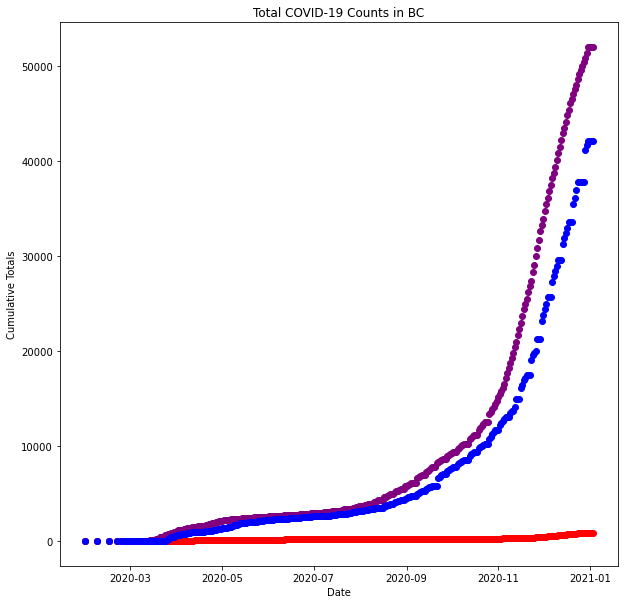

In [77]:
# Plot the cumulative counts, deaths, and recoveries
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(covid_data['date'],
        covid_data['numtotal'],
        color='purple')

ax.scatter(covid_data['date'],
        covid_data['numdeaths'],
        color='red')

ax.scatter(covid_data['date'],
        covid_data['numrecover'],
        color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cumulative Totals",
       title="Total COVID-19 Counts in BC")

plt.show()

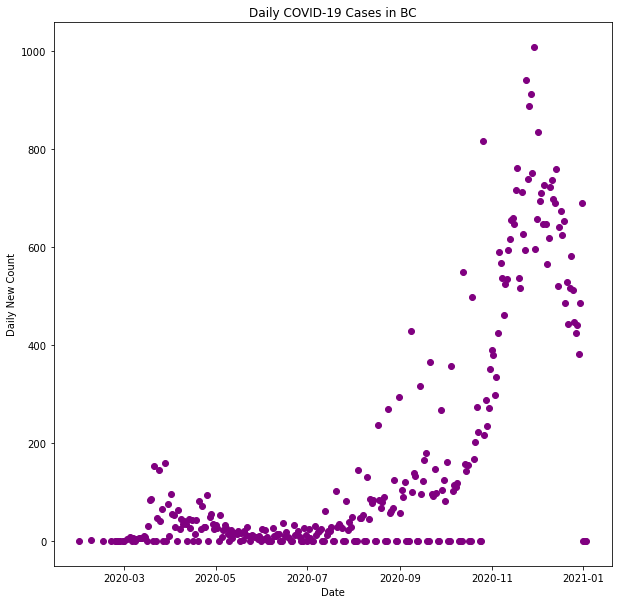

In [78]:
# plot individual case counts
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(covid_data['date'],
        covid_data['new_count'],
        color='purple')

ax.set(xlabel="Date",
       ylabel="Daily New Count",
       title="Daily COVID-19 Cases in BC")

plt.show()

From the plot above, it appears that there are many dates with no new cases. This is due to dates where reporting didn't occur (weekends, holidays, etc) and the date after each unreported period contains a cumulative count for the past unreported dates. These unreported dates need to be infilled. 

Additionally, it can be seen that there are gaps at the beginning of the dataframe. Reindex the dataframe to create a complete date range. We will just infill with zeros as it is assumed these are either zero counts or unreported dates which will get infilled using the method below.  

In [80]:
# change the date column to the index and the drop the date column
covid_data.index = pd.DatetimeIndex(covid_data.date)
covid_data.drop(columns='date', inplace=True)
# create the complete date range
idx = pd.date_range(covid_data.index.min(), covid_data.index.max())
# update the index with the full date range and fill the new rows with zeros
covid_data = covid_data.reindex(idx, fill_value=0)
# move the date index to a column and create a new integer index
covid_data.reset_index(inplace = True)
covid_data.rename(columns={'index':'date'}, inplace = True)

In [81]:
# Need to recalculate days elapsed to populate new date rows
covid_data['days_elapse'] = (covid_data['date'] - covid_data['date'].min()).dt.days

In [82]:
# create new columns for the modifications
covid_data['new_count_update'] = covid_data['new_count']
covid_data['new_deaths_update'] = covid_data['new_deaths']
covid_data['new_recover_update'] = covid_data['new_recover']

In [83]:
# remove any rows with zero counts at the end of the dataframe as they represent unreported values
# use the counts column for this as it is assumed any days without counts would also not have counts for deaths and recovery
# but possibly not the other way around
max_index = len(covid_data) - 1
print('inital dataframe length', max_index)

# work backwards through the data frame removing rows until a non-zero count in encountered
for i in range(max_index):
    rev_i = max_index - i
    if covid_data.loc[rev_i, 'new_count'] == 0:
        covid_data.drop([rev_i], inplace = True)
        print("dropped row ", rev_i)
    # break the loop once a non-zero value is found    
    else: break
        
max_index = len(covid_data) - 1
print('updated dataframe length', max_index)

inital dataframe length 338
dropped row  338
dropped row  337
dropped row  336
updated dataframe length 335


In [84]:
# we don't want to infill days with zero data at the beginning of the record as they likely real
# cases look like they increase at the beginning of March
# from the do a check of the values around the start of March
covid_data.loc[:,('date','new_count', 'new_deaths', 'new_recover')][(covid_data['date'] < '2020-03-30') & (covid_data['date'] >= '2020-02-20')]

,date,new_count,new_deaths,new_recover
20,2020-02-20,0.0,0.0,0.0
21,2020-02-21,1.0,0.0,0.0
22,2020-02-22,0.0,0.0,0.0
23,2020-02-23,0.0,0.0,0.0
24,2020-02-24,0.0,0.0,0.0
25,2020-02-25,1.0,0.0,0.0
26,2020-02-26,0.0,0.0,0.0
27,2020-02-27,0.0,0.0,0.0
28,2020-02-28,0.0,0.0,0.0
29,2020-02-29,0.0,0.0,0.0


From the data, it appears that cases only start really increasing after March 1, 2020; therefore only apply infilling of zero case values after this date (ccorresponding to index 30). This index will also be used for infilling deaths. Recoveries do not start until March 26, 2020 and infilling of zero values will not be applied until after this date (index 55).

In [85]:
# Function to smooth out values over the unreported dates
# Assuming that an unreported case count is 0 value
# NOTE THAT THIS FUNCTION PERFORMS INPLACE OPERATIONS!
def corrector(df, col_name, ind):
    # check if the column of interest has a zero value at the index
    if df.loc[ind, col_name] == 0:
        temp_list = [ind]
        counter = 1
                
        # continue looping forward and adding to the list for any zero values
        while df.loc[(ind+counter), col_name] == 0:
            temp_list.append(ind+counter)
            counter += 1
            # break the loop if the end of the dataframe is reached
            if ind+counter == max_index: break
                    
        # also append the first non-zero value as this will represent the cumulative count from the zero days        
        temp_list.append(ind+counter)
            
        # the following calculations determine the average for the days
        temp_length = len(temp_list)
        old_value_count = df.loc[(temp_list[-1]), col_name]
        # only use complete integers (rounding down to ensure don't increase the count)
        new_values_count = math.floor(old_value_count / temp_length)
        # calculate the remainder from rounding downto ensure complete count is preserved
        remainder_count = old_value_count - (temp_length * new_values_count)
            
        # replacing the corresponding values stored in the temporary index list
        for ind_replace in temp_list:
            # if the last value (which is the non-zero count in the index list), add the remainder
            if ind_replace == temp_list[-1]:
                df.loc[ind_replace, col_name] = (new_values_count + remainder_count)
            else:
                df.loc[ind_replace, col_name] = new_values_count
    

In [88]:
# loops through the dataframe applying the function above as zero counts are indicated
# originally did this as a single loo
# use the counts column for this as it is assumed any days without counts would also not have counts for deaths and recovery
# but possibly not the other way around
for ind, row in covid_data.iterrows():
    # start above index 30 for counts and deaths as discussed above
    if ind > 30 and row['new_count_update'] == 0:
        corrector(covid_data, 'new_count_update', ind)
    if ind > 30 and row['new_deaths_update'] == 0:
        corrector(covid_data, 'new_deaths_update', ind)
    # start above index 55 for recoveries as discussed above
    if ind > 55 and row['new_recover_update'] == 0:
        corrector(covid_data, 'new_recover_update', ind)

In [89]:
# create new columns representing the cumulative values after the corrections above are applied
covid_data['new_numtotal'] = covid_data['new_count_update'].cumsum()
covid_data['new_numdeaths'] = covid_data['new_deaths_update'].cumsum()
covid_data['new_numrecover'] = covid_data['new_recover_update'].cumsum()

In [90]:
# check that total numbers are preserved
covid_data.loc[:, ('new_numtotal', 'numtotal', 'new_numdeaths','numdeaths', 'new_numrecover', 'numrecover', 'new_recover_update', 'new_recover')].iloc[-1]

new_numtotal          51990.0
numtotal              51990.0
new_numdeaths           901.0
numdeaths               901.0
new_numrecover        42127.0
numrecover            42127.0
new_recover_update      446.0
new_recover             446.0
Name: 335, dtype: float64

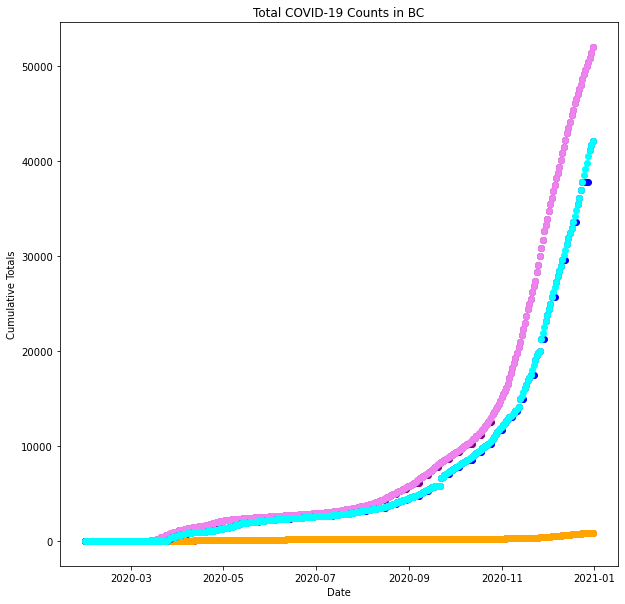

In [91]:
# Replot the cumulative totals to check that total values are preserved and assess changes
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(covid_data['date'],
        covid_data['numtotal'],
        color='purple')

ax.scatter(covid_data['date'],
        covid_data['new_numtotal'],
        color='violet')

ax.scatter(covid_data['date'],
        covid_data['numdeaths'],
        color='red')

ax.scatter(covid_data['date'],
        covid_data['new_numdeaths'],
        color='orange')

ax.scatter(covid_data['date'],
        covid_data['numrecover'],
        color='blue')

ax.scatter(covid_data['date'],
        covid_data['new_numrecover'],
        color='cyan')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cumulative Totals",
       title="Total COVID-19 Counts in BC")

plt.show()

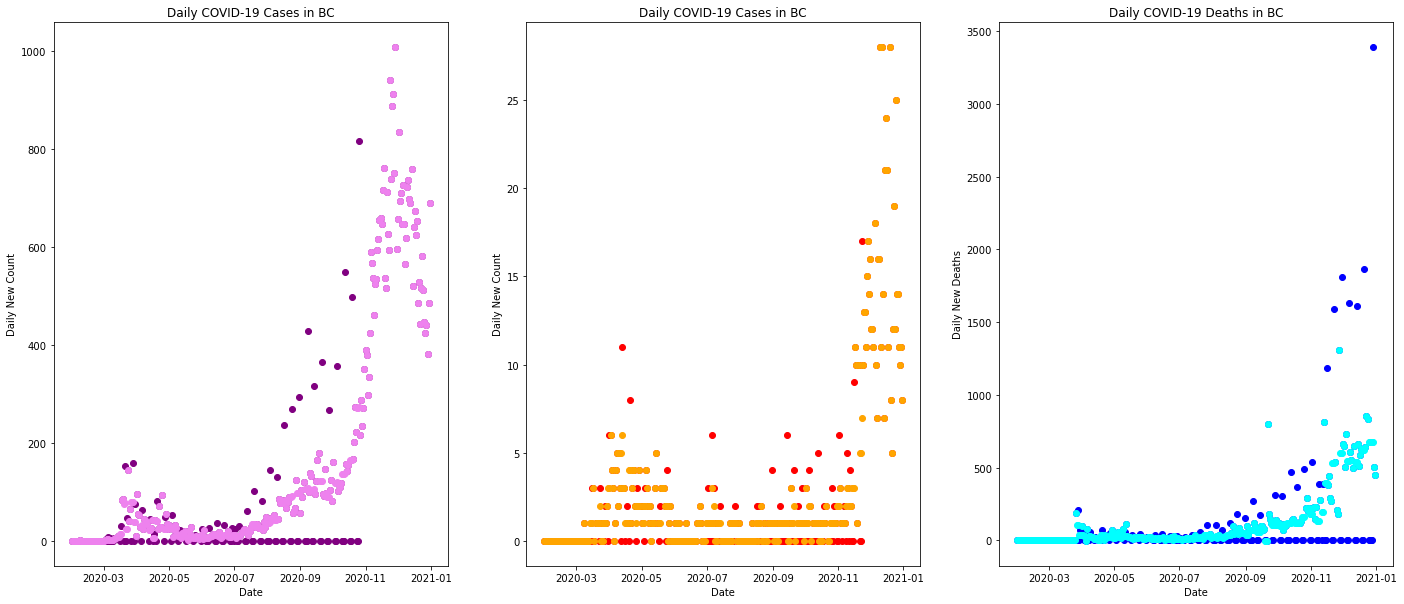

In [92]:
# plot individual case counts to show corrections
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 10))

ax1.scatter(covid_data['date'],
        covid_data['new_count'],
        color='purple')

ax1.scatter(covid_data['date'],
        covid_data['new_count_update'],
        color='violet')

ax1.set(xlabel="Date",
       ylabel="Daily New Count",
       title="Daily COVID-19 Cases in BC")

ax2.scatter(covid_data['date'],
        covid_data['new_deaths'],
        color='red')

ax2.scatter(covid_data['date'],
        covid_data['new_deaths_update'],
        color='orange')

ax2.set(xlabel="Date",
       ylabel="Daily New Count",
       title="Daily COVID-19 Cases in BC")

ax3.scatter(covid_data['date'],
        covid_data['new_recover'],
        color='blue')

ax3.scatter(covid_data['date'],
        covid_data['new_recover_update'],
        color='cyan')

ax3.set(xlabel="Date",
       ylabel="Daily New Deaths",
       title="Daily COVID-19 Deaths in BC")


plt.show()

In [35]:
covid_data.loc[:,('date', 'new_recover', 'new_recover_update')][(covid_data['date'] >= '2020-09-15') & (covid_data['date'] < '2020-11-15')]

,date,new_recover,new_recover_update
258,2020-10-15,145.0,145.0
259,2020-10-16,130.0,130.0
260,2020-10-17,0.0,122.0
261,2020-10-18,0.0,122.0
262,2020-10-19,366.0,122.0
263,2020-10-20,118.0,118.0
264,2020-10-21,122.0,122.0
265,2020-10-22,121.0,121.0
266,2020-10-23,133.0,133.0
267,2020-10-24,0.0,162.0


In [32]:
# create a new dataframe with just the columns of interest
covid_data_out = covid_data[['date', 'days_elapse', 'new_count_update', 'new_deaths_update', 'new_recover_update', 'new_numtotal', 'new_numdeaths', 'new_numrecover']].copy()

In [33]:
covid_data_out.dtypes

original_index                 int64
date                  datetime64[ns]
days_elapse                    int64
new_count_update             float64
new_deaths_update            float64
new_recover_update           float64
new_numtotal                 float64
new_numdeaths                float64
new_numrecover               float64
dtype: object

In [43]:
# export to csv file
export_filepath = covid_filepath[:-4] + '_mod.csv'
covid_data_out.to_csv(export_filepath, index=False, header=True)